# Starup.ML - Logistic Regression From Scratch Exercise
## Chris Cronin

## Agenda

1. Excercise Description
2. Math Review
3. Load Sample Dataset
4. Logistic Regression Modeling Functions
5. Logistic Regression Evaluation 
6. Sources

## Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import patsy
import random 
from __future__ import division
import matplotlib.pyplot as plt 
import math
from IPython.display import Image
import seaborn as sns
%matplotlib inline

/Users/Cronin/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Part 1: Problem Statement
- Go through the process of coding logistic regression from scratch on a simple dataset
- Show understanding of what the logistic regression model is doing

## Part 2: Math Review

Notes below on important review concepts for logistic regression

Probability Review

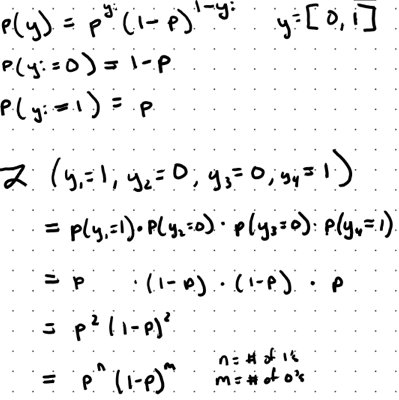

In [2]:
Image("pic_probability.png")

Deriving the Cost Function

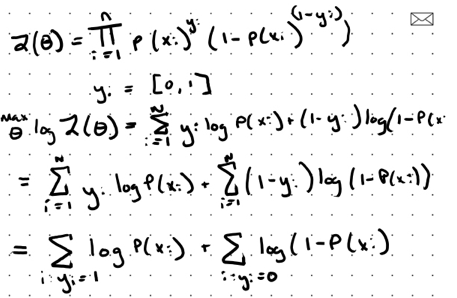

In [3]:
Image("pic_costfunction.png")

Sigmoid Function

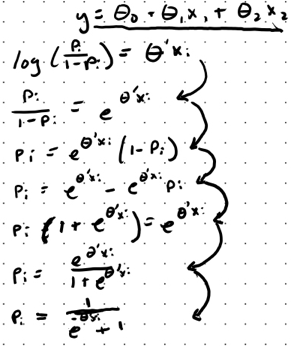

In [4]:
Image("pic_sigmoid.png")

- Example

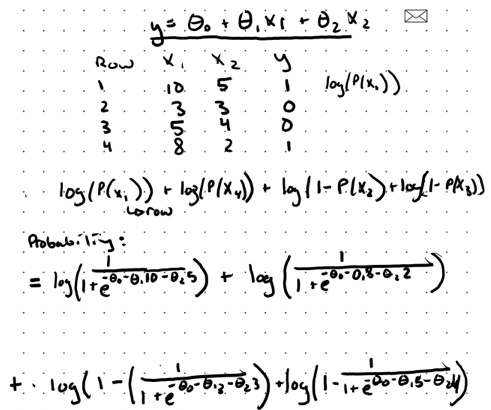

In [5]:
Image("pic_example.png")

Minimize the sum of the differences in probability

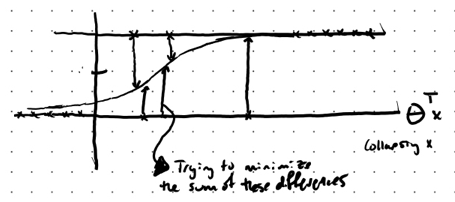

In [6]:
Image("pic_differences.png")

Thetas and X values in linear equation will produce a line fitting the data

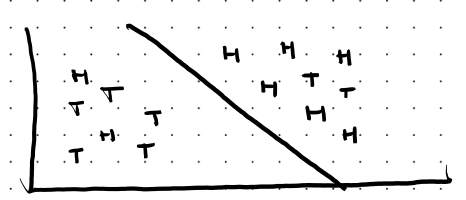

In [7]:
Image("pic_line.png")

## Part 3: Loading Simple Dataset

- I chose to model logistic regression using the Haberman Survival Dataset, which can be found at https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival
- Abstract: Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer

Dataset Attribute Information:

1. age_at_op: Age of patient at time of operation (numerical) 
2. year_of_op: Patient's year of operation (year - 1900, numerical) 
3. pos_nodes: Number of positive axillary nodes detected (numerical) 
4. survival: Survival status (class attribute)
    * 1 = the patient survived 5 years or longer 
    * 2 = the patient died within 5 years

Read/Load the data into a dataframe

In [8]:
cols = ["age_at_op", "year_of_op", "pos_nodes", "survival"]

cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=cols)

In [9]:
cancer.head()

,age_at_op,year_of_op,pos_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Change the response "survival" column values from "1" & "2" to "0" and "1" classes

In [10]:
cancer.survival.value_counts()

1    225
2     81
Name: survival, dtype: int64

In [11]:
cancer['survival'] = (cancer['survival'] < 2).astype(int)

In [12]:
cancer.survival.value_counts()

1    225
0     81
Name: survival, dtype: int64

Create X and y from dataframe

In [13]:
feature_cols = ['age_at_op', 'year_of_op', 'pos_nodes']
target_col = ['survival']
X = cancer[feature_cols]
y = cancer[target_col]

## Part 4: Logistic Regression Modeling Functions

$y = \beta_{0} + \beta{1}AAO + \beta_{2}YOP + \beta_{3}PN$
- AAO: Age At Operation
- YOP: Year of Operation
- PN: Pos Nodes

#### Logistic or Sigmoid Function

Andrew Ng's Description

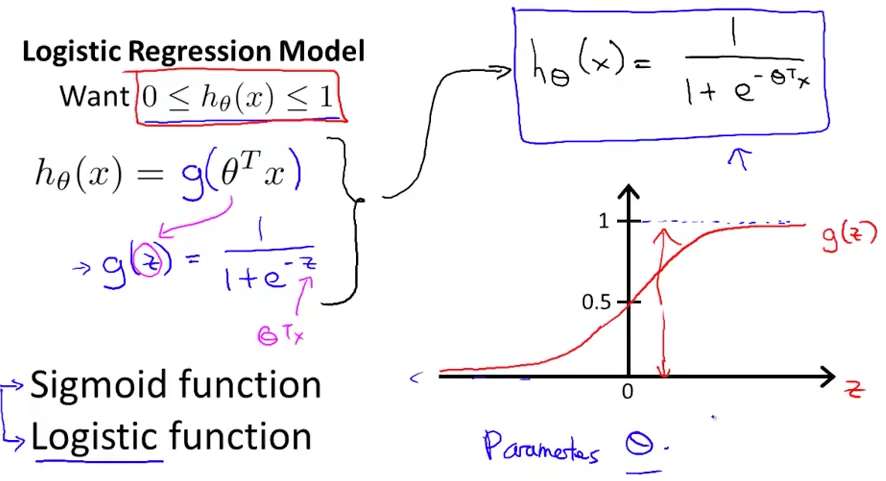

In [14]:
Image("sigmoid_function.png")

In [15]:
def sigmoid_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))

#### Cost Function

Andrew Ng's Description

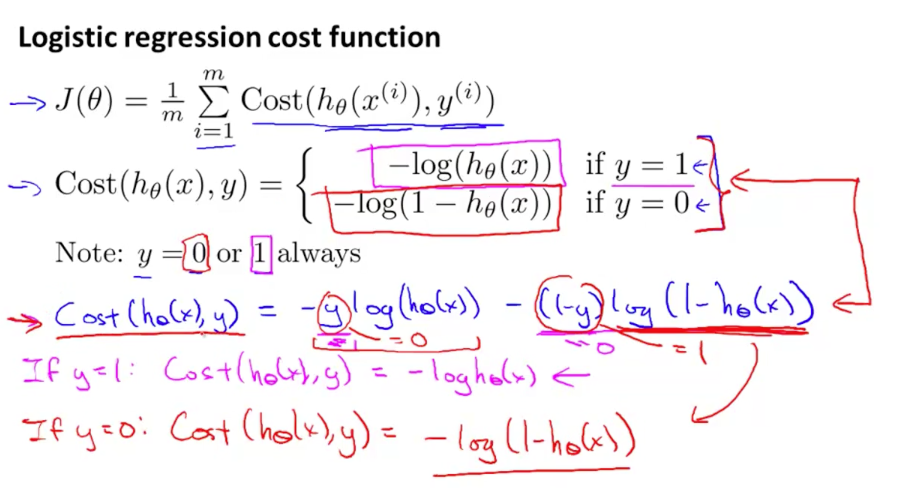

In [16]:
Image("cost_function4.png")

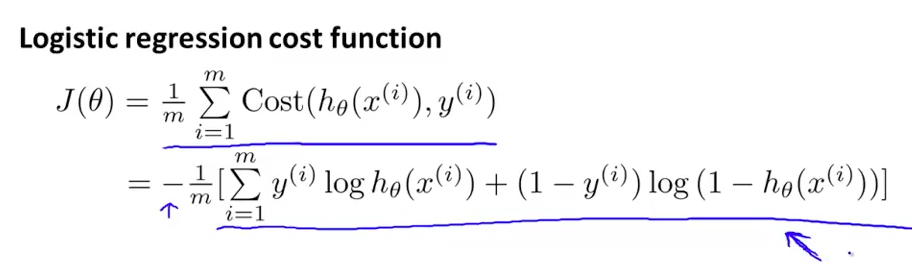

In [17]:
Image("cost_function.png")

In [18]:
def cost_function(theta, x, y):
    y = np.squeeze(y)
    if_one = y * np.log(sigmoid_func(theta,x))
    if_zero = (1-y) * np.log(1 - sigmoid_func(theta,x))
    cost = -if_one - if_zero
    return np.mean(cost)

#### Gradient Descent

Andrew Ng's Description

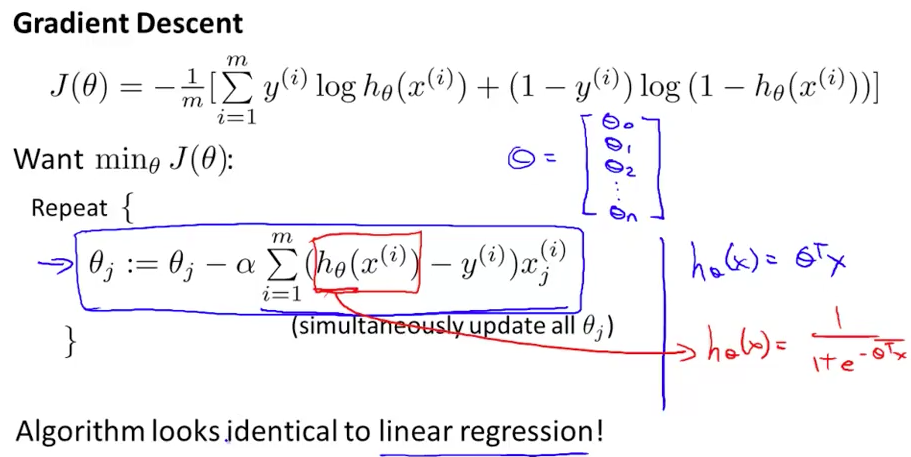

In [19]:
Image("gradient_descent.png")

Gradient Descent Function

In [20]:
def log_gradient(theta, x, y):
    step_one = sigmoid_func(theta, x) - np.squeeze(y) # Estimated - Actual.
    step_two = step_one.T.dot(x) # transposing to a dot product with x features
    return step_two

In [21]:
def grad_descent(theta_values, X, y, lr=.001, converge_change=.001):
    # Normalize to prevent overfitting: Subtract the mean and divide by standard deviation.
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iteration
    cost_iter = []
    cost = cost_function(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_function(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_values, np.array(cost_iter)

## Part 5: Logistic Regression Evaluation

Prediction Function with threshold

In [24]:
def pred_vals(theta, X):
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #normalize
    pred_prob = sigmoid_func(theta, X)
    prediction = np.where(pred_prob >= .5, 1, 0)
    return prediction

Betas and Cost Iteration

In [22]:
betas = np.zeros(X.shape[1])
fitted_values, cost_iter = grad_descent(betas, X, y)
print(fitted_values)
print(cost_iter)

age_at_op    -0.086028
year_of_op    0.008298
pos_nodes    -0.337034
dtype: float64
[[  0.           0.69314718]
 [  1.           0.688165  ]
 [  2.           0.68389288]
 [  3.           0.68022267]
 [  4.           0.67706047]
 [  5.           0.67432644]
 [  6.           0.67195364]
 [  7.           0.6698864 ]
 [  8.           0.66807851]
 [  9.           0.66649166]
 [ 10.           0.665094  ]
 [ 11.           0.663859  ]
 [ 12.           0.66276441]
 [ 13.           0.66179155]]


Comparing model predictions vs actual 

In [25]:
predicted_y = pred_vals(fitted_values, X)
np.sum(y.values.flatten() == predicted_y)
# 226 were right out of 306

226

Comparing model predictions vs actual using Scikit Learn

In [26]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y.values.flatten())
sum(y.values.flatten() == logreg.predict(X))
# Difference between this and 226 above might have to do with normalization and threshold

229

## Part 6: Sources

- Kevin Markham's Logistic Regression Page: http://www.dataschool.io/logistic-regression-in-python-using-scikit-learn/
- Tyler Folkman's Learning with Data: http://learningwithdata.com/
- Andrew Ng's Machine Learning Course: https://www.coursera.org/learn/machine-learning